#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os

#### Set up directories

In [8]:
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
input_dir = parent_dir + "\\" + 'inputs'
output_dir = parent_dir + "\\" + 'outputs'

#### Read input file(s)

In [22]:
default_of_credit_card_clients = pd.read_excel(input_dir + "\\" + "default of credit card clients.xls", header=1)

In [23]:
default_of_credit_card_clients.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [24]:
df = default_of_credit_card_clients.copy()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


K-nearest neighbor Accuracy: 0.7953333333333333
Confusion Matrix:
[[4312  375]
 [ 853  460]]

Logistic regression Accuracy: 0.81
Confusion Matrix:
[[4550  137]
 [1003  310]]

Discriminant analysis Accuracy: 0.8088333333333333
Confusion Matrix:
[[4529  158]
 [ 989  324]]

Naive Bayesian Accuracy: 0.7085
Confusion Matrix:
[[3396 1291]
 [ 458  855]]

Neural networks Accuracy: 0.8118333333333333
Confusion Matrix:
[[4393  294]
 [ 835  478]]

Classification trees Accuracy: 0.7211666666666666
Confusion Matrix:
[[3800  887]
 [ 786  527]]



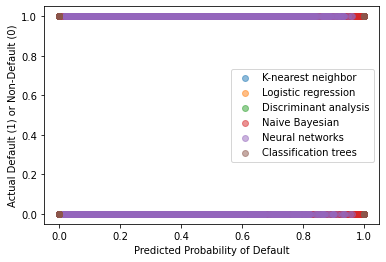

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset or generate synthetic data
# Replace this with your data loading logic
# For example: df = pd.read_csv('your_dataset.csv')

# Assume 'X' contains your features and 'y' contains labels
# Adjust accordingly based on your dataset
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'K-nearest neighbor': KNeighborsClassifier(),
    'Logistic regression': LogisticRegression(),
    'Discriminant analysis': LinearDiscriminantAnalysis(),
    'Naive Bayesian': GaussianNB(),
    'Neural networks': MLPClassifier(),
    'Classification trees': DecisionTreeClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix
    }

# Print and visualize results
for name, result in results.items():
    print(f"{name} Accuracy: {result['accuracy']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")

# Visualize results (scatter plot, lift chart, etc.)
# You may need to implement the Sorting Smoothing Method separately

# Example scatter plot
for name, result in results.items():
    plt.scatter(result['model'].predict_proba(X_test)[:, 1], y_test, label=name, alpha=0.5)

plt.xlabel('Predicted Probability of Default')
plt.ylabel('Actual Default (1) or Non-Default (0)')
plt.legend()
plt.show()


Logistic Regression Accuracy: 0.81
Confusion Matrix:
[[81 23]
 [15 81]]

Random Forest Accuracy: 0.95
Confusion Matrix:
[[96  8]
 [ 2 94]]

SVM Accuracy: 0.96
Confusion Matrix:
[[99  5]
 [ 3 93]]



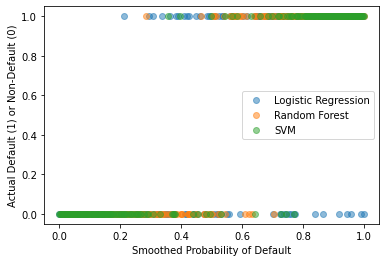

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification

def sorting_smoothing(predictions, alpha=0.5):
    """
    Sorting Smoothing Method to smooth classification predictions.

    Parameters:
    - predictions: Numpy array of predicted probabilities (values between 0 and 1).
    - alpha: Smoothing parameter, a value between 0 and 1.

    Returns:
    - Smoothed predictions.
    """
    n = len(predictions)
    sorted_indices = np.argsort(predictions)
    weights = np.linspace(0, 1, n)

    smoothed_predictions = np.zeros_like(predictions)
    smoothed_predictions[sorted_indices] = alpha * weights + (1 - alpha) * predictions[sorted_indices]

    return smoothed_predictions

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities
    smoothed_predictions = sorting_smoothing(y_pred, alpha=0.5)  # Apply Sorting Smoothing Method

    accuracy = accuracy_score(y_test, np.round(smoothed_predictions))
    conf_matrix = confusion_matrix(y_test, np.round(smoothed_predictions))
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'smoothed_predictions': smoothed_predictions
    }

# Print and visualize results
for name, result in results.items():
    print(f"{name} Accuracy: {result['accuracy']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")

# Visualize smoothed results (scatter plot, lift chart, etc.)
for name, result in results.items():
    plt.scatter(result['smoothed_predictions'], y_test, label=name, alpha=0.5)

plt.xlabel('Smoothed Probability of Default')
plt.ylabel('Actual Default (1) or Non-Default (0)')
plt.legend()
plt.show()
